# Predicted Effect of Rule Curve Changes on Rainy River Flows

The purpose of this notebook is to analyze the role of rule curves in establishing the 'surge capacity' of the Namakan Reservior / Rainy Lake system, and in modifying the outflow of Rainy Lake to Rainy River.

* <a href=#section01>Import Rule Curves</a>
* <a href=#section04>Effects of Rule Curves on Rainy River Flows</a>
* <a href=#section05>Imputed Change in Flows to Rainy Rainy due to 2000 Rule Curve Change</a>
* <a href=#section06>Conclusions</a>

In [1]:
# Display graphics inline with the notebook
%matplotlib inline

# Standard Python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime

# Module to enhance matplotlib plotting
import seaborn
seaborn.set()

# Modules to display images and data tables
from IPython.display import Image
from IPython.core.display import display

# Styles
from IPython.core.display import HTML
HTML(open("styles/custom.css", "r").read())

## <a name=section01></a>Import Rule Curves

In [2]:
dir = './data/'

NL1970 = pd.read_pickle(dir+'NL1970.pkl')
RL1970 = pd.read_pickle(dir+'RL1970.pkl')

NL2000 = pd.read_pickle(dir+'NL2000.pkl')
RL2000 = pd.read_pickle(dir+'RL2000.pkl')

## <a name=section04></a>Effects of Rule Curves on Rainy River Flows

The seasonal change is lake levels modify the outflow of water into Rainy River. During periods of rising levels, the flow into Rainy River is reduced by an amount equal to the rate of change in water volume of Namakan and Rainy Lakes. Flow into Rainy River is increased during  periods of falling lake levels. 

The following calculations estimate how much the flow into Rainy River is increased or decreased assuming the lake levels are managed to the midpoints of the rule curves.

Area of the Namakan Reservoir (Kabetogama, Namakan, Sand, Crane, Little Vermillion) (From Cohen and Radomski, 1993)

In [3]:
# area is sq. meters
areaNL = 25973 * 10000   

Area of Rainy Lake (From IJC Rainy River Modeling Phase II, 2011)

In [4]:
# area is sq. meters
areaRL = 95770 * 10000

Rate of lake level changes assuming levels are managed to the mid-point of the rule curves.

In [5]:
dNL1970 = 0.5*(NL1970['LRC']+NL1970['URC']).diff()
dRL1970 = 0.5*(RL1970['LRC']+RL1970['URC']).diff()
dNL2000 = 0.5*(NL2000['LRC']+NL2000['URC']).diff()
dRL2000 = 0.5*(RL2000['LRC']+RL2000['URC']).diff()

Compute rate of change of volume assuming constant areas each lake. The rates of change are calculated in units of cubic meters per second to be comparable to reported river flows.

In [6]:
qNL1970 = -areaNL*dNL1970/(24*3600)
qRL1970 = -areaRL*dRL1970/(24*3600)
qNL2000 = -areaNL*dNL2000/(24*3600)
qRL2000 = -areaRL*dRL2000/(24*3600)

q1970 = qNL1970 + qRL1970
q2000 = qNL2000 + qRL2000

Create plots showing changes in flow to Rainy River due to changes in lake levels.

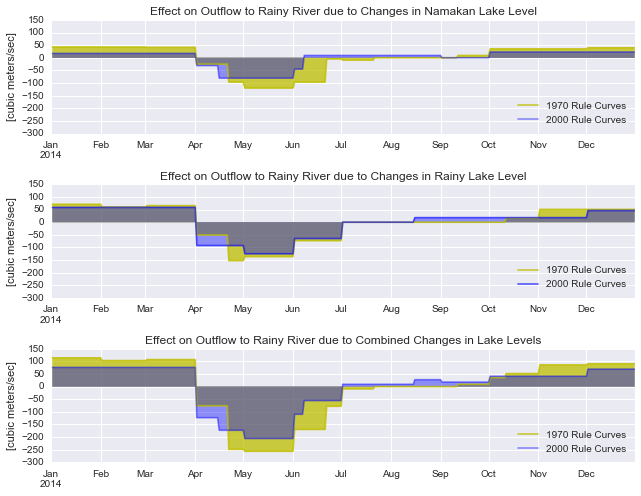

In [7]:
plt.figure(figsize=(9,7))
ylim = [-300, 150]

plt.subplot(3,1,1)
plt.hold(True)
qNL1970.plot(color='y',alpha=0.75)
qNL2000.plot(color='b',alpha=0.4)
plt.fill_between(qNL1970.index,0,qNL1970.tolist(),color='y', alpha='0.75')
plt.fill_between(qNL2000.index,0,qNL2000.tolist(),color='b', alpha='0.4')
plt.legend(['1970 Rule Curve'],loc='upper right')
plt.hold(False)
plt.ylim(ylim)
plt.ylabel('[cubic meters/sec]')
plt.title('Effect on Outflow to Rainy River due to ' + \
          'Changes in Namakan Lake Level')
plt.legend(['1970 Rule Curves','2000 Rule Curves'],loc='lower right')

plt.subplot(3,1,2)
plt.hold(True)
qRL1970.plot(color='y',alpha=0.75)
qRL2000.plot(color='b',alpha=0.6)
plt.fill_between(qRL1970.index,0,qRL1970.tolist(),color='y', alpha='0.75')
plt.fill_between(qRL2000.index,0,qRL2000.tolist(),color='b', alpha='0.4')
plt.hold(False)
plt.ylim(ylim)
plt.ylabel('[cubic meters/sec]')
plt.title('Effect on Outflow to Rainy River due to ' + \
          'Changes in Rainy Lake Level')
plt.legend(['1970 Rule Curves','2000 Rule Curves'],loc='lower right')

plt.subplot(3,1,3)
plt.hold(True)
q1970.plot(color='y',alpha=0.75)
q2000.plot(color='b',alpha=0.4)
plt.fill_between(q1970.index,0,q1970.tolist(),color='y', alpha='0.75')
plt.fill_between(q2000.index,0, q2000.tolist(), color='b', alpha='0.4')
plt.hold(False)
plt.ylim(ylim)
plt.ylabel('[cubic meters/sec]')
plt.title('Effect on Outflow to Rainy River due to ' + \
          'Combined Changes in Lake Levels')
plt.legend(['1970 Rule Curves','2000 Rule Curves'],loc='lower right')

plt.tight_layout()

## <a name=section05></a>Imputed Change in Flows to Rainy Rainy due to 2000 Rule Curve Change

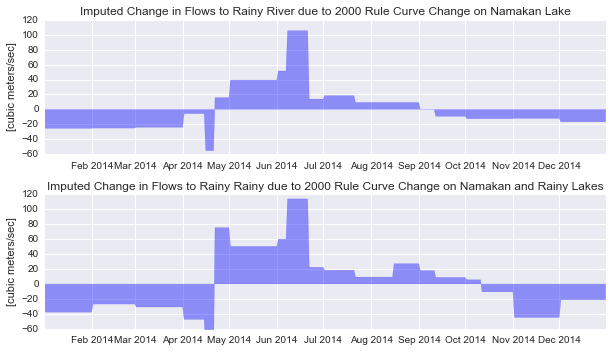

In [10]:
dqNL = qNL2000 - qNL1970
dq = q2000 - q1970

plt.figure(figsize=(9,5))

plt.subplot(2,1,1)
plt.fill_between(dqNL.index,0, dqNL.tolist(), color='b', alpha='0.4')
plt.ylabel('[cubic meters/sec]')
plt.title('Imputed Change in Flows to Rainy River due to 2000 Rule Curve Change on Namakan Lake')
plt.ylim([-60,120])

plt.subplot(2,1,2)
plt.fill_between(dq.index,0, dq.tolist(), color='b', alpha='0.4')
plt.ylabel('[cubic meters/sec]')
plt.title('Imputed Change in Flows to Rainy Rainy due to 2000 Rule Curve Change on Namakan and Rainy Lakes')
plt.ylim([-60,120])

plt.tight_layout()

fname = './images/ImputedChangeInFlows.png'

plt.savefig(fname)
!convert $fname -trim $fname
!convert $fname -transparent white $fname

## <a name=section06></a>Conclusions

1. The 2000 change in rule curves for Namakan and Rainy Lakes must, if implemented as written, result in change in annual distribution of outflows on Rainy River. Due the change in rule curves, flows on Rainy River are reduced in the winter months by about 30 cubic feet per second, and increased from mid-May to late June by amounts ranging from 50 cubic feet per second to over 100 cubic feet per second. 
2. Most of the change in annual distribution is due to the change in rule curves for Namakan Lake. 